# Ford GoBike
## by Mustafa Elnaquib

## Preliminary Wrangling

> Dataset lists the data of 183412 trips made by ford GoBike Bike Sharing app.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Learn about factors affecting trip duration

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(set(df['user_type']))

{'Subscriber', 'Customer'}


In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.dropna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [7]:
df['member_birth_year'].astype('Int64')

0         1984
1          NaN
2         1972
3         1989
4         1974
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 183412, dtype: Int64

In [8]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] =df['start_time'].dt.strftime('%-H').astype('int')
df['weekday'] = df['start_time'].dt.strftime('%w').astype('int') #index of day in week; Sunday:0 , Monday: 1, ...
df['start_station_id'] = df['start_station_id'].astype('Int64')
df['end_station_id'] = df['end_station_id'].astype('Int64')

In [9]:
df['age'] = pd.DatetimeIndex(df['start_time']).year - df['member_birth_year'].astype('Int64')


In [10]:
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'] == "Yes"

df['subscribed'] = df['user_type'] == "Subscriber"

In [11]:
df['duration_min'] = df['duration_sec'] // 60


In [12]:
del df['end_time']


del df['start_station_name']
del df['end_station_name']

del df['member_birth_year']
del df['user_type']

del df['duration_sec']

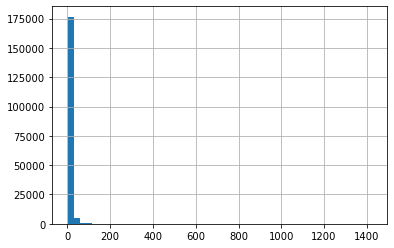

In [13]:
df['duration_min'].hist(bins=50)

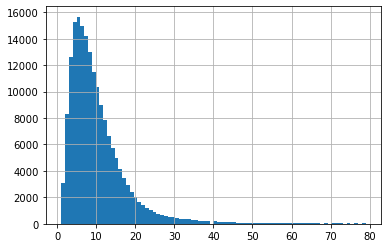

In [14]:
df = df[df['duration_min'] < 80]
df['duration_min'].hist(bins=80)

In [ ]:
df.to_csv('data_wrangled.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

### What is the structure of your dataset?

> There are 183412 trips in the dataset with 16 features (
duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)
All data is from February 2019, and depeding on station coordinates minimum and maximum; (37.317298, -122.453704) and (37.880222, -121.874119) all in San Francisco area.
 
station IDs should be integers; 
And seeing that user types are only subscriber and customer, boolean field wether rider is a customer is easier to use
duration in minutes rather than seconds is more appropriate
user age rather than birthyear, since start times convers short timespan, users of same age are  same generation.
I also added start_day to represent day in Week, as it ouwld propably have effect on usage;

### What is/are the main feature(s) of interest in your dataset?

> start_day, age, distance


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration of trips, start adn end stations, users age and gender, and whther is a subscriber, and whether bike shared all trip.

## Univariate Exploration


In [ ]:
def hist(col, bins, xlabel=None, title=None, ylabel=None):
    if not xlabel:
        xlabel = col.capitalize()
    if not ylabel:
        ylabel = 'Count'
    if not title:
        title = 'Distribution of ' + xlabel

    df[col].hist(bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [ ]:
hist('duration_min', 80, "Duration in Minutes")

> Trips usually take less than 20 minutes, and most trips 4:7 minutes

In [ ]:
df['member_gender'].value_counts().plot.pie()
plt.title('Distribution of Gender')


> Most users are males, aound 3 to 1 to females

In [ ]:
df['subscribed'].value_counts().plot.pie(labels=['Non-subscribers', 'Subscribers'])
plt.title('Subscribed and Non-subscribed User Percentage')
# plt.xticks([False, True], ['Non-subscribers', 'Subscribers']);


> most of user are subscriber to the service

In [ ]:
hist('weekday', 7, "Week Days")
plt.title('Distribution among Week Days')


In [ ]:
df['weekday'].value_counts().plot.pie()

> Aside from weekend days, SUnday and saturdays, which has the lowest ride counts, Riders ride mostly on Turesday, and ride less on Mondays

In [ ]:
hist('hour', 24, "Hour in Day")

In [ ]:
df['hour'].value_counts().plot.pie()

> Most Riders ride on 7:9 am and then again, 4 to 7 pm

In [ ]:
hist('age', 7)

> most users are in age band 20:40

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I expected more users of age 13:20 to ride bikes, but I guess those may enjoy to own thier personal bikes.

> start datetime made more since  transform to weekdays and day hours, because those would show more significance.
Also changing time durtion to minutes made data more presentable, since accuracy to seconds to not really needed here.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I expected more users of age 13:20 to ride bikes, but I guess those may enjoy to own thier personal bikes.

> start datetime made more since  transform to weekdays and day hours, because those would show more significance.
Also changing time durtion to minutes made data more presentable, since accuracy to seconds to not really needed here.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
df.groupby('member_gender')['duration_min'].mean().plot(kind='bar')
plt.title('Average Duration in minutes of Different Genders')
plt.xlabel('Gender')
plt.ylabel('Duration(min)')

In [ ]:
df.groupby('subscribed')['duration_min'].mean().plot(kind='bar');
plt.xticks([False, True], ['Non-subscribers', 'Subscribers']);
plt.title('Average Duration in minutes of Subsribed and Non-subscribed Users')
plt.xlabel('User Subscription')
plt.ylabel('Duration(min)')

In [ ]:
df.groupby('weekday')['duration_min'].mean().plot(kind='bar');
plt.title('Average Duration in minutes of Trips in different Week Days')
plt.xlabel('Week Days')
plt.ylabel('Duration(min)')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> looking at the relation between trip duration and different factors, the following could be noticed;

>> Males riders ride the shorter trips on average

>> Non subscriber rider ride for longer durations, 1.5 times the sibscriber trips average duration.

>> On weekends, riders take longer trips for pleasure as expected, since on work days riders may prefer other means of transportation for longer trips.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> nonsubscribers take longer trips on average!

## Multivariate Exploration


In [ ]:
plt.title('Trip duration for different genders and age bands')

df_male = df[df['member_gender'] == 'Male']
plot_male = plt.scatter(df_male['age'], df_male['duration_min'], alpha=.2)

df_female = df[df['member_gender'] == 'Female']
plot_female = plt.scatter(df_female['age'], df_female['duration_min'], alpha=.2)

df_other = df[df['member_gender'] == 'Other']
plot_other = plt.scatter(df_other['age'], df_other['duration_min'], alpha=.2)

plt.legend([plot_female, plot_male, plot_other], ['Female', 'Male', 'Other'])


> Gender distribution according to age and trip duration is similar, however  longer trip duration were mianly done by male riders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> riders different genders recorded the longest ride periods between age of 20 and 40.

### Were there any interesting or surprising interactions between features?

> Although Male rider have higher ride dutations, in range of 60:80 minutes, they had the lowset average among genders.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
!python3 -m nbconvert exploration.ipynb